In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma

# 워드클라우드
from wordcloud import WordCloud

In [2]:
df =pd.read_csv('./부산가볼만한곳_유튜브.csv',encoding='utf-8')

In [3]:
df['title'].str[0:]

0      부산여행 완전정복 !  권역별로 꼭 가봐야하는 부산여행지 23곳 추천, 야경명소, ...
1      22년~23년 부산여행을 가장 잘하는 방법! 이 영상 하나만 보면 해결됩니다! 꼭 ...
2                      부산 주요핫플 총정리💥 Busan Travel Ι 부산여행👍
3      부산여행 필수코스 18곳 | 부산시민은 알고 관광객만 모르는💡야경 스팟 & 부산 갈...
4                                       부산 여행 가볼만한 곳 베스트
                             ...                        
774                       대구근교펜션 공기좋고 운치있는 청도까사로마풀빌라 입니다
775                                  부산 여행 숨은 명소_동백섬 둘레길
776                                    부산 해운대 fc신드롬 홍보영상
777                  부산여행가면 코스로 먹을수있는 술안주 다 맛집 인정 웨이팅 기본
778    #경상도 #여행지추천 | 장사상륙작전 전승기념관 | #2022보훈사적지탐방 #202...
Name: title, Length: 779, dtype: object

In [4]:
df['title']= df['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df['title']=df["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [5]:
df

,title
0,부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 ...
1,22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야...
2,부산 주요핫플 총정리 Busan Travel Ι 부산여행
3,부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마...
4,부산 여행 가볼만한 곳 베스트
...,...
774,대구근교펜션 공기좋고 운치있는 청도까사로마풀빌라 입니다
775,부산 여행 숨은 명소_동백섬 둘레길
776,부산 해운대 fc신드롬 홍보영상
777,부산여행가면 코스로 먹을수있는 술안주 다 맛집 인정 웨이팅 기본


In [6]:
df['title'].to_csv('./부산가볼만한곳_split.csv',encoding='utf-8',index=False)

In [7]:
df['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,부산여행,완전정복,권역별로,꼭,가봐야하는,부산여행지,23곳,추천,야경명소,부산카페,...,Travel,None,None,None,None,None,None,None,None,None
1,22년,23년,부산여행을,가장,잘하는,방법,이,영상,하나만,보면,...,부산,신상여행지,부터,야경,일몰명소,핫플레이스,까지,None,None,None
2,부산,주요핫플,총정리,Busan,Travel,Ι,부산여행,,None,None,...,None,None,None,None,None,None,None,None,None,None
3,부산여행,필수코스,18곳,부산시민은,알고,관광객만,모르는,야경,스팟,부산,...,곳들,카카오맵,여행지도,공유,,None,None,None,None,None
4,부산,여행,가볼만한,곳,베스트,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,대구근교펜션,공기좋고,운치있는,청도까사로마풀빌라,입니다,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
775,부산,여행,숨은,명소_동백섬,둘레길,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
776,부산,해운대,fc신드롬,홍보영상,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
777,부산여행가면,코스로,먹을수있는,술안주,다,맛집,인정,웨이팅,기본,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
# 파일로드
data = pd.read_csv('./부산가볼만한곳_split.csv',encoding='utf-8')
data = data['title']

In [9]:
data

0      부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 ...
1      22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야...
2                       부산 주요핫플 총정리 Busan Travel Ι 부산여행 
3      부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마...
4                                       부산 여행 가볼만한 곳 베스트
                             ...                        
774                       대구근교펜션 공기좋고 운치있는 청도까사로마풀빌라 입니다
775                                  부산 여행 숨은 명소_동백섬 둘레길
776                                    부산 해운대 fc신드롬 홍보영상
777                  부산여행가면 코스로 먹을수있는 술안주 다 맛집 인정 웨이팅 기본
778     경상도 여행지추천 장사상륙작전 전승기념관 2022보훈사적지탐방 2022보훈릴레이 ...
Name: title, Length: 779, dtype: object

In [10]:
# 데이터가져오기
f = open("./부산가볼만한곳_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [11]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [12]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [13]:
#많이 나온 단어
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)

키워드
부산      1085
여행       231
부산여행     176
추천       154
맛집       138
        ... 
해양        10
산책        10
뚜벅        10
키즈        10
아기        10
Length: 100, dtype: int64


In [14]:
count_data = korean.to_dict()

In [15]:
from collections import Counter


count = Counter(count_data)

In [16]:
count

Counter({'부산': 1085,
         '여행': 231,
         '부산여행': 176,
         '추천': 154,
         '맛집': 138,
         '해운대': 107,
         '코스': 94,
         '여행지': 81,
         '카페': 72,
         '기장': 64,
         '로그': 58,
         '브이': 58,
         '광안': 53,
         '마을': 51,
         '아이': 48,
         '송도': 46,
         '공원': 45,
         '명소': 44,
         '바다': 36,
         '파크': 36,
         '영도': 35,
         '투어': 35,
         '야경': 34,
         '문화': 33,
         '국내': 33,
         '호텔': 31,
         '근교': 31,
         '낚시': 29,
         '밀양': 27,
         '데이트': 27,
         '경남': 26,
         '스카이': 26,
         '케이블카': 25,
         '영상': 25,
         '서면': 24,
         '힐링': 22,
         '박물관': 21,
         '드론': 20,
         '태종대': 20,
         '전망대': 20,
         '드라이브': 20,
         '요트': 19,
         '거리': 19,
         '당일치기': 19,
         '해동용궁사': 19,
         '박일': 19,
         '감천': 18,
         '구경': 17,
         '촬영': 17,
         '축제': 17,
         '가을': 17,
      

In [17]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

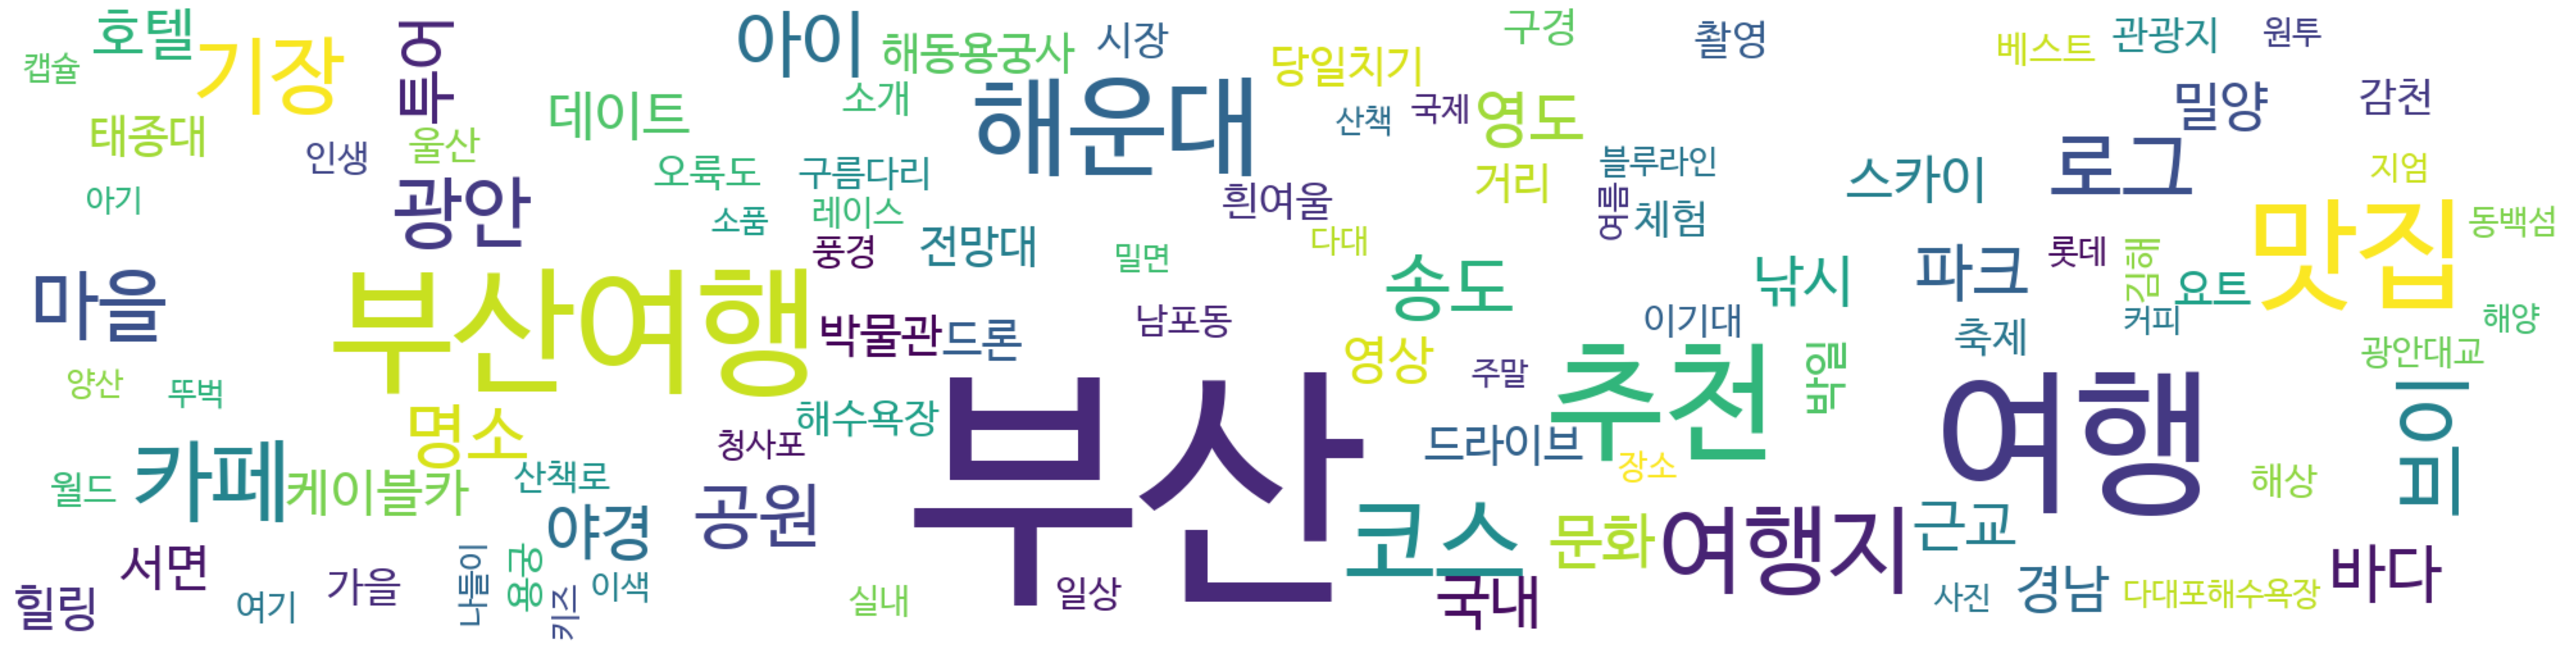

In [18]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()